In [21]:
%%capture
%run 03_Model_RNN_BNN.ipynb

In [22]:
BATCH_SIZE = 10

# Input pipeline

In [23]:
# prepare data generators using tf.data
train_dataset = (
    tf.data.Dataset.from_tensor_slices((z_train, mu_train))
    #.shuffle(TRAIN_LENGTH, reshuffle_each_iteration=True)
    .batch(BATCH_SIZE, drop_remainder=False)
);

#test_dataset = tf.data.Dataset.from_tensor_slices((z_test,mu_test)).batch(BATCH_SIZE);
val_dataset = (
    tf.data.Dataset.from_tensor_slices((z_val,mu_val))
    .batch(BATCH_SIZE, drop_remainder=False)
);

# Train

In [24]:
model = my_model(0.2)

In [25]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-3), 
    loss = tf.keras.losses.MeanSquaredError(), 
    metrics = tf.keras.metrics.RootMeanSquaredError())

In [26]:
# Create a callback that saves the model's weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(out_dir,'cp.ckpt'), 
    monitor='val_loss', 
    save_weights_only=True, 
    verbose=1, 
    save_best_only=True
    )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=1,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-10
)

early_stopping = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=5,
        verbose=1
    )
]
epochs = 1000
model_history = model.fit(train_dataset,
                          epochs = epochs,
                          validation_data = val_dataset,
                          callbacks = [checkpoint, early_stopping]
                          )

Epoch 1/1000
 8/14 [================>.............] - ETA: 0s - loss: 1.0246 - root_mean_squared_error: 1.0122 
Epoch 00001: val_loss improved from inf to 0.82546, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 3s 51ms/step - loss: 1.0477 - root_mean_squared_error: 1.0236 - val_loss: 0.8255 - val_root_mean_squared_error: 0.9085
Epoch 2/1000
 8/14 [================>.............] - ETA: 0s - loss: 0.8459 - root_mean_squared_error: 0.9197
Epoch 00002: val_loss improved from 0.82546 to 0.64375, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 12ms/step - loss: 0.8654 - root_mean_squared_error: 0.9303 - val_loss: 0.6438 - val_root_mean_squared_error: 0.8023
Epoch 3/1000
 9/14 [==================>...........] - ETA: 0s - loss: 0.7266 - root_mean_squared_error: 0.8524
Epoch 00003: val_loss improved from 0.64375 to 0.58398, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 10m

Epoch 23/1000
 9/14 [==================>...........] - ETA: 0s - loss: 0.1066 - root_mean_squared_error: 0.3265
Epoch 00023: val_loss improved from 0.07032 to 0.06585, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 10ms/step - loss: 0.1137 - root_mean_squared_error: 0.3373 - val_loss: 0.0659 - val_root_mean_squared_error: 0.2566
Epoch 24/1000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0979 - root_mean_squared_error: 0.3129
Epoch 00024: val_loss improved from 0.06585 to 0.06265, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 10ms/step - loss: 0.1056 - root_mean_squared_error: 0.3250 - val_loss: 0.0626 - val_root_mean_squared_error: 0.2503
Epoch 25/1000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0917 - root_mean_squared_error: 0.3028
Epoch 00025: val_loss improved from 0.06265 to 0.05886, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 

Epoch 46/1000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0429 - root_mean_squared_error: 0.2070
Epoch 00046: val_loss improved from 0.02696 to 0.02672, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 10ms/step - loss: 0.0472 - root_mean_squared_error: 0.2172 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1635
Epoch 47/1000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0396 - root_mean_squared_error: 0.1989
Epoch 00047: val_loss improved from 0.02672 to 0.02630, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 10ms/step - loss: 0.0461 - root_mean_squared_error: 0.2147 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1622
Epoch 48/1000
 9/14 [==================>...........] - ETA: 0s - loss: 0.0424 - root_mean_squared_error: 0.2059
Epoch 00048: val_loss improved from 0.02630 to 0.02598, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 

Epoch 69/1000
10/14 [====================>.........] - ETA: 0s - loss: 0.0286 - root_mean_squared_error: 0.1692
Epoch 00069: val_loss improved from 0.01569 to 0.01516, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 10ms/step - loss: 0.0288 - root_mean_squared_error: 0.1696 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1231
Epoch 70/1000
10/14 [====================>.........] - ETA: 0s - loss: 0.0269 - root_mean_squared_error: 0.1640
Epoch 00070: val_loss did not improve from 0.01516
14/14 [==============================] - 0s 8ms/step - loss: 0.0290 - root_mean_squared_error: 0.1704 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1247
Epoch 71/1000
10/14 [====================>.........] - ETA: 0s - loss: 0.0270 - root_mean_squared_error: 0.1643
Epoch 00071: val_loss improved from 0.01516 to 0.01437, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 9ms/step - loss: 0.0282 - root_mean_squared_erro

11/14 [======================>.......] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.1364
Epoch 00092: val_loss improved from 0.00933 to 0.00891, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 9ms/step - loss: 0.0196 - root_mean_squared_error: 0.1401 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0944
Epoch 93/1000
11/14 [======================>.......] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1408
Epoch 00093: val_loss did not improve from 0.00891
14/14 [==============================] - 0s 8ms/step - loss: 0.0200 - root_mean_squared_error: 0.1413 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0960
Epoch 94/1000
11/14 [======================>.......] - ETA: 0s - loss: 0.0193 - root_mean_squared_error: 0.1388
Epoch 00094: val_loss improved from 0.00891 to 0.00835, saving model to ../out/pantheon/lstm/cp.ckpt
14/14 [==============================] - 0s 9ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val

In [180]:
# model.save_weights(os.path.join(out_dir, 'cp.ckpt'))

In [27]:
# load the best weights
model.load_weights(os.path.join(out_dir, 'cp.ckpt'))

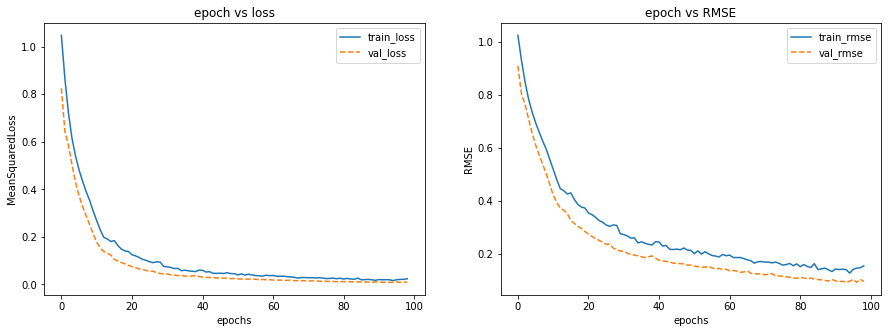

In [28]:
# plot epoch vs loss, epoch vs RMSE
plt.figure(figsize=(15,5))

epochs = len(model_history.history['loss'])

plt.subplot(1,2,1)
plt.plot(np.arange(0,epochs,1), model_history.history['loss'], '-', label='train_loss')
plt.plot(np.arange(0,epochs,1), model_history.history['val_loss'], '--', label='val_loss', )
plt.xlabel('epochs')
plt.ylabel('MeanSquaredLoss')
plt.title('epoch vs loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0,epochs,1), model_history.history['root_mean_squared_error'], '-', label='train_rmse')
plt.plot(np.arange(0,epochs,1), model_history.history['val_root_mean_squared_error'], '--', label='val_rmse')
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('epoch vs RMSE')
plt.legend()
plt.savefig(os.path.join(out_dir,'05_epoch_vs_loss.png'))
plt.show()

In [29]:
#model.evaluate(test_dataset)

# Sample Reconstruction

In [30]:
# Reconstruct 
z_reconstruct = np.linspace(0,8.5,212)[::-1]
z_reconstruct = np.expand_dims(strided_app(z_reconstruct, window_size, 1), axis=-1)

In [31]:
mu_reconstruct = model.predict(z_reconstruct, batch_size=BATCH_SIZE)
mu_reconstruct = mu_scaler.inverse_transform(mu_reconstruct.reshape(-1,4))

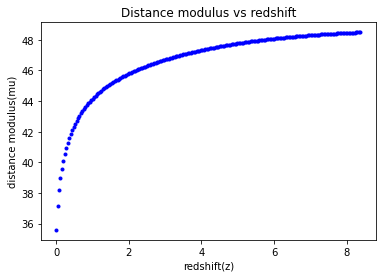

In [32]:
# plot reconstructed z vs mu
plt.plot(z_reconstruct[:,-1].flatten(), mu_reconstruct[:,-1].flatten(), '.',color='b');
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('Distance modulus vs redshift')
plt.savefig(os.path.join(out_dir,'06_sample_reconstruction.png'))
plt.show()

# Sample Reconstruction with uncertainity

In [33]:
model_u = model_uncertainity()

In [34]:
model_u.load_weights(os.path.join(out_dir,'cp.ckpt'))

In [35]:
model_u.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.RootMeanSquaredError())

In [36]:
mu_reconstruct_uncertainity = []
n = 1000
for i in range(n):
    y_pred = model_u.predict(z_reconstruct, batch_size=500)[:,-1].flatten()
    y_pred = mu_scaler.inverse_transform(y_pred.reshape(-1,1))
    mu_reconstruct_uncertainity.append(y_pred)

In [37]:
mu_reconstruct_uncertainity = np.array(mu_reconstruct_uncertainity)
mean = np.mean(mu_reconstruct_uncertainity, axis=0).flatten()
std_dev = np.std(mu_reconstruct_uncertainity, axis=0).flatten()

In [38]:
# z_reconstruct = z_scaler.inverse_transform(z_reconstruct[:,-1]) 

/tmp/ipykernel_919186/3499777157.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(df_SNe['zCMB'], df_SNe['MU'], yerr=df_SNe['MUERR'], fmt='.r', label=dataset+' Sample', color='r');


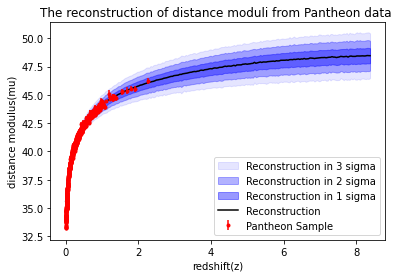

In [39]:
#plt.figure(figsize=(10,7))
plt.fill_between(
    z_reconstruct[:,-1].flatten(), 
    mean-3*std_dev, mean+3*std_dev,
    label='Reconstruction in 3 sigma',color='b', alpha=0.1)
plt.fill_between(
    z_reconstruct[:,-1].flatten(), 
    mean-2*std_dev, mean+2*std_dev,
    label='Reconstruction in 2 sigma',color='b', alpha=0.3)
plt.fill_between(
    z_reconstruct[:,-1].flatten(), 
    mean-1*std_dev, mean+1*std_dev,
    label='Reconstruction in 1 sigma', color='b', alpha=0.4)

plt.plot(z_reconstruct[:,-1].flatten(), mean, label='Reconstruction', color='k')
plt.errorbar(df_SNe['zCMB'], df_SNe['MU'], yerr=df_SNe['MUERR'], fmt='.r', label=dataset+' Sample', color='r');
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('The reconstruction of distance moduli from '+dataset+' data ')
plt.legend()
plt.savefig(os.path.join(out_dir,'07_sample_reconstruction_with_uncertainity.png'))
plt.show()